# Найдите топ-3 ParentCategory по GMV (суммарная выручка,
# которую принесла продажа товаров этой категории)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
categories = pd.read_pickle('data/categories.pkl')
orders = pd.read_pickle('data/orders.pkl')

In [5]:
data = []

for i in orders['items']:
    data += i
    # c+=1
    # if c == 3:
    #     break
# print(data)
df_items = pd.DataFrame(data)
# print(df_items)

result_df = pd.DataFrame({
    'ItemID': df_items['ItemID'],
    'Total Price': df_items['price'] * df_items['quantity']

})

summed_df = result_df.groupby('ItemID', as_index=False).sum()

# # Делаем DataFrame categories из двух столбцов
categories = categories[['ItemID', 'ParentCategory']]

# Соединяем DataFrame по ItemID
final_df = pd.merge(summed_df, categories, on='ItemID')

group_parent_category = final_df.groupby('ParentCategory', as_index=False).sum()

# Сортируем по Total Price от большего к меньшему
res_end = group_parent_category.sort_values(by='Total Price', ascending=False)

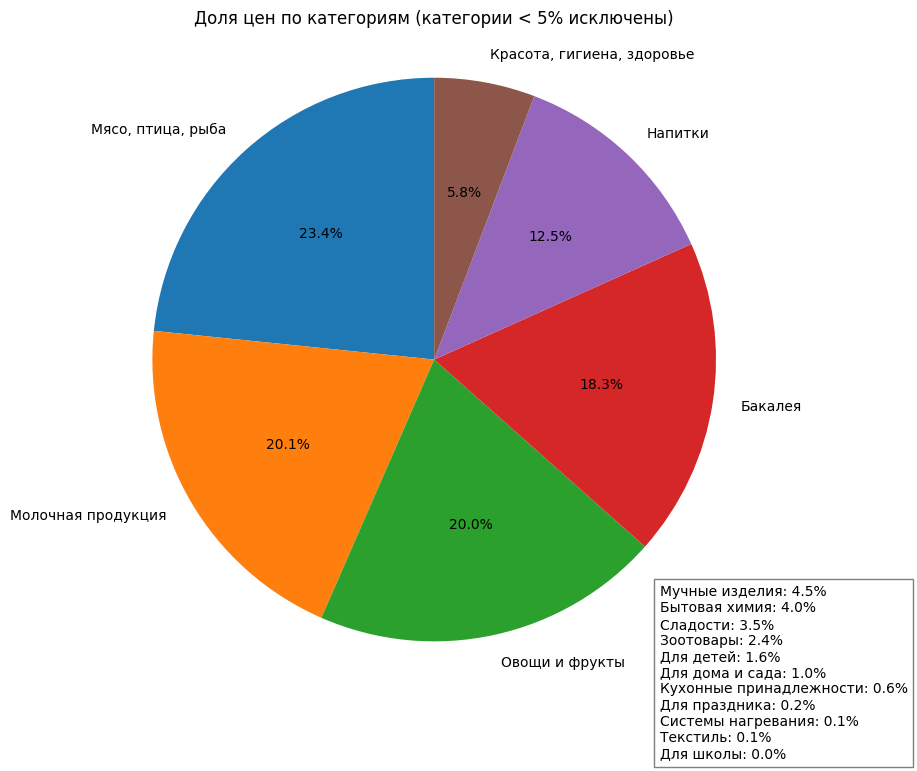

In [6]:
# Рассчитываем общий объем
total_price = res_end['Total Price'].sum()

# Рассчитываем процент для каждой категории
res_end['Percentage'] = (res_end['Total Price'] / total_price) * 100

# Фильтруем категории, которые занимают менее 5%
filtered_df = res_end[res_end['Percentage'] >= 4.7]

# Выводим список категорий, которые занимают менее 5%
less_than_5_percent = res_end[res_end['Percentage'] < 4.7]

# Построение круговой диаграммы для оставшихся категорий
plt.figure(figsize=(8, 8))
plt.pie(filtered_df['Total Price'], labels=filtered_df['ParentCategory'], autopct='%1.1f%%', startangle=90)
plt.title('Доля цен по категориям (категории < 5% исключены)', pad=20)
plt.axis('equal')  # Чтобы круговая диаграмма была кругом

# Добавление текста с категориями, занимающими менее 5%, в правом нижнем углу
if not less_than_5_percent.empty:
    text_str = '\n'.join(f"{row['ParentCategory']}: {row['Percentage']:.1f}%" for _, row in less_than_5_percent.iterrows())
    plt.text(0.8, -0.8, text_str, fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()